# Problem Set 3 - Arath Reyes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, t, uniform
import warnings
warnings.filterwarnings('ignore')

## P3

Illustrate the Law of Large Numbers and the Central Limit Theorem for the $t_{\nu}$ -distribution
for different values of $\nu$. Write a Python notebook for the following simulation for a given
value of $\nu$. Start with $\nu$ = 100.

(a) Draw M i.i.d. random samples of length N from the $t_{\nu}$ distribution. Start with
M = 500 and N = 10, 000 but you should experiment with different values.

(b) For each sample m = 1, . . . , M , compute the sample means for the first n = 5, 10, 100,
500, 1000, 10000 draws of the sample.

(c) For each n, compute the mean, standard deviation and variance of the sample means
across the M samples. This yields means, standard deviations, and variances for each
of the six different values of n. Report your results in a table.

(d) For each n, plot the distributions of the M sample means.

(e) Describe how these simulations relate to the LLN and the CLT. Be careful to distinguish the implications of the LLN and the CLT.

(f) Repeat steps (a) to (e) for $\nu$ = 10, 5, 2, 1, 0.5.

(g) How does the value of $\nu$ affect the limiting behavior of the sample mean?

### (a), (b), (c), (d)

### For $\nu=100$

In [7]:
M, N = 500, 10_000
dof = 100

In [8]:
def problem_3(dof, M = 500, N = 10_000):
    n_list = [5, 10, 100, 500, 1_000, 10_000]
    print(f"Stats of a t-Student with v = {dof}")
    me, var, skew, kurt =  t.stats(dof, moments='mvsk')
    print(f"Mean: {me}, Variance: {var}, Skewness : {skew}, Kurtosis : {kurt}")
    sample = pd.DataFrame()
    for m in range(M):
        sample[f'X({m+1})'] = t.rvs(dof, size = N)
    means = pd.DataFrame(columns = sample.columns, index = n_list)
    for n in n_list:
        means.loc[n] = sample[:n].mean()
    stats = pd.DataFrame(columns = ['Mean', 'StDev', 'Var'], index = n_list)
    normalized = (means - me)/np.sqrt(var)
    for n in n_list:
        stats['Mean'][n] = means.loc[n].mean()
        stats['StDev'][n] = means.loc[n].std()
        stats['Var'][n] = means.loc[n].var()
        normalized.loc[n] = np.sqrt(n)*normalized.loc[n]
    

    return sample, means, stats, normalized

In [9]:
sample, means, stats, normalized = problem_3(dof, M, N)

Stats of a t-Student with v = 100
Mean: 0.0, Variance: 1.0204081632653061, Skewness : 0.0, Kurtosis : 0.0625


In [10]:
sample.head()

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(491),X(492),X(493),X(494),X(495),X(496),X(497),X(498),X(499),X(500)
0,-0.038857,1.315252,0.395315,-0.528565,-1.327554,1.169730,-0.166762,0.261398,0.130112,0.904503,...,0.790969,-0.940257,0.248641,-0.252102,0.152088,1.095188,-0.560262,-0.229696,0.112152,1.685676
1,0.690238,-1.437067,0.602825,0.238783,0.010296,-0.333362,-0.229265,0.154677,-1.427223,-0.151515,...,0.632536,-0.641649,0.700814,-1.325745,-0.432039,0.457306,-3.747708,0.363985,-0.817817,-0.433309
2,-1.194227,0.692033,0.797436,0.349929,-1.307997,1.050417,-0.382719,0.054560,-0.045238,1.332664,...,-0.403052,0.699835,-1.068359,-1.213709,0.309617,1.494204,-0.868089,1.911347,0.298893,1.820984
3,-1.015409,-1.111251,-0.114105,-0.561016,-0.738922,-0.842004,-2.211297,0.522892,1.521490,-0.850200,...,0.751765,0.443255,-1.181885,-0.513710,0.376126,0.395606,-0.207832,-0.183804,-0.623903,0.475597
4,-1.006713,-1.034440,0.535115,0.289632,1.891662,-0.929002,-0.126961,0.386271,-2.076863,-0.441434,...,-0.217137,0.394187,0.179822,0.402217,-0.752843,-0.162777,-0.058835,0.208349,1.016509,-0.068382


In [11]:
means

,X(1),X(2),X(3),X(4),X(5),X(6),X(7),X(8),X(9),X(10),...,X(491),X(492),X(493),X(494),X(495),X(496),X(497),X(498),X(499),X(500)
5,-0.512994,-0.315095,0.443317,-0.042248,-0.294503,0.023156,-0.623401,0.27596,-0.379544,0.158804,...,0.311016,-0.008926,-0.224193,-0.58061,-0.06941,0.655905,-1.088545,0.414036,-0.002833,0.696113
10,-0.204341,0.118932,0.561712,0.223555,-0.550982,0.083517,-0.395674,0.188525,-0.363591,-0.060211,...,0.298223,0.216455,-0.500395,-0.39029,0.096968,0.477532,-0.246341,0.010032,0.130946,0.217818
100,0.058347,0.009111,-0.013625,-0.008991,-0.088828,0.082492,-0.003679,0.193297,-0.130999,-0.064665,...,-0.125219,-0.068805,-0.073677,0.071112,0.009549,-0.001661,-0.045176,-0.03702,-0.069226,0.149354
500,-0.012437,0.018295,0.018069,-0.00449,-0.033266,-0.015237,-0.093732,0.062441,-0.030142,-0.074561,...,0.031236,-0.017787,0.013891,0.024555,-0.030879,-0.02401,0.023955,0.02339,0.00843,0.013696
1000,-0.021353,0.008196,0.024767,0.009572,-0.033559,-0.001128,-0.084919,0.039068,0.012219,-0.079799,...,0.020991,0.018956,0.011295,0.005157,-0.016197,-0.006809,-0.002508,0.021118,-0.007822,0.021218
10000,0.005763,0.012475,-0.001366,-0.010863,0.006619,0.009976,0.003469,-0.001817,-0.010781,0.005852,...,-0.000006,0.004053,-0.001772,0.002403,-0.003025,0.00375,0.008551,0.003555,0.004072,-0.007035


In [12]:
stats

,Mean,StDev,Var
5,0.007666,0.438008,0.191851
10,0.005596,0.309313,0.095675
100,-0.00072,0.101675,0.010338
500,-0.002052,0.043014,0.00185
1000,-0.002586,0.031763,0.001009
10000,-0.000243,0.009877,0.000098


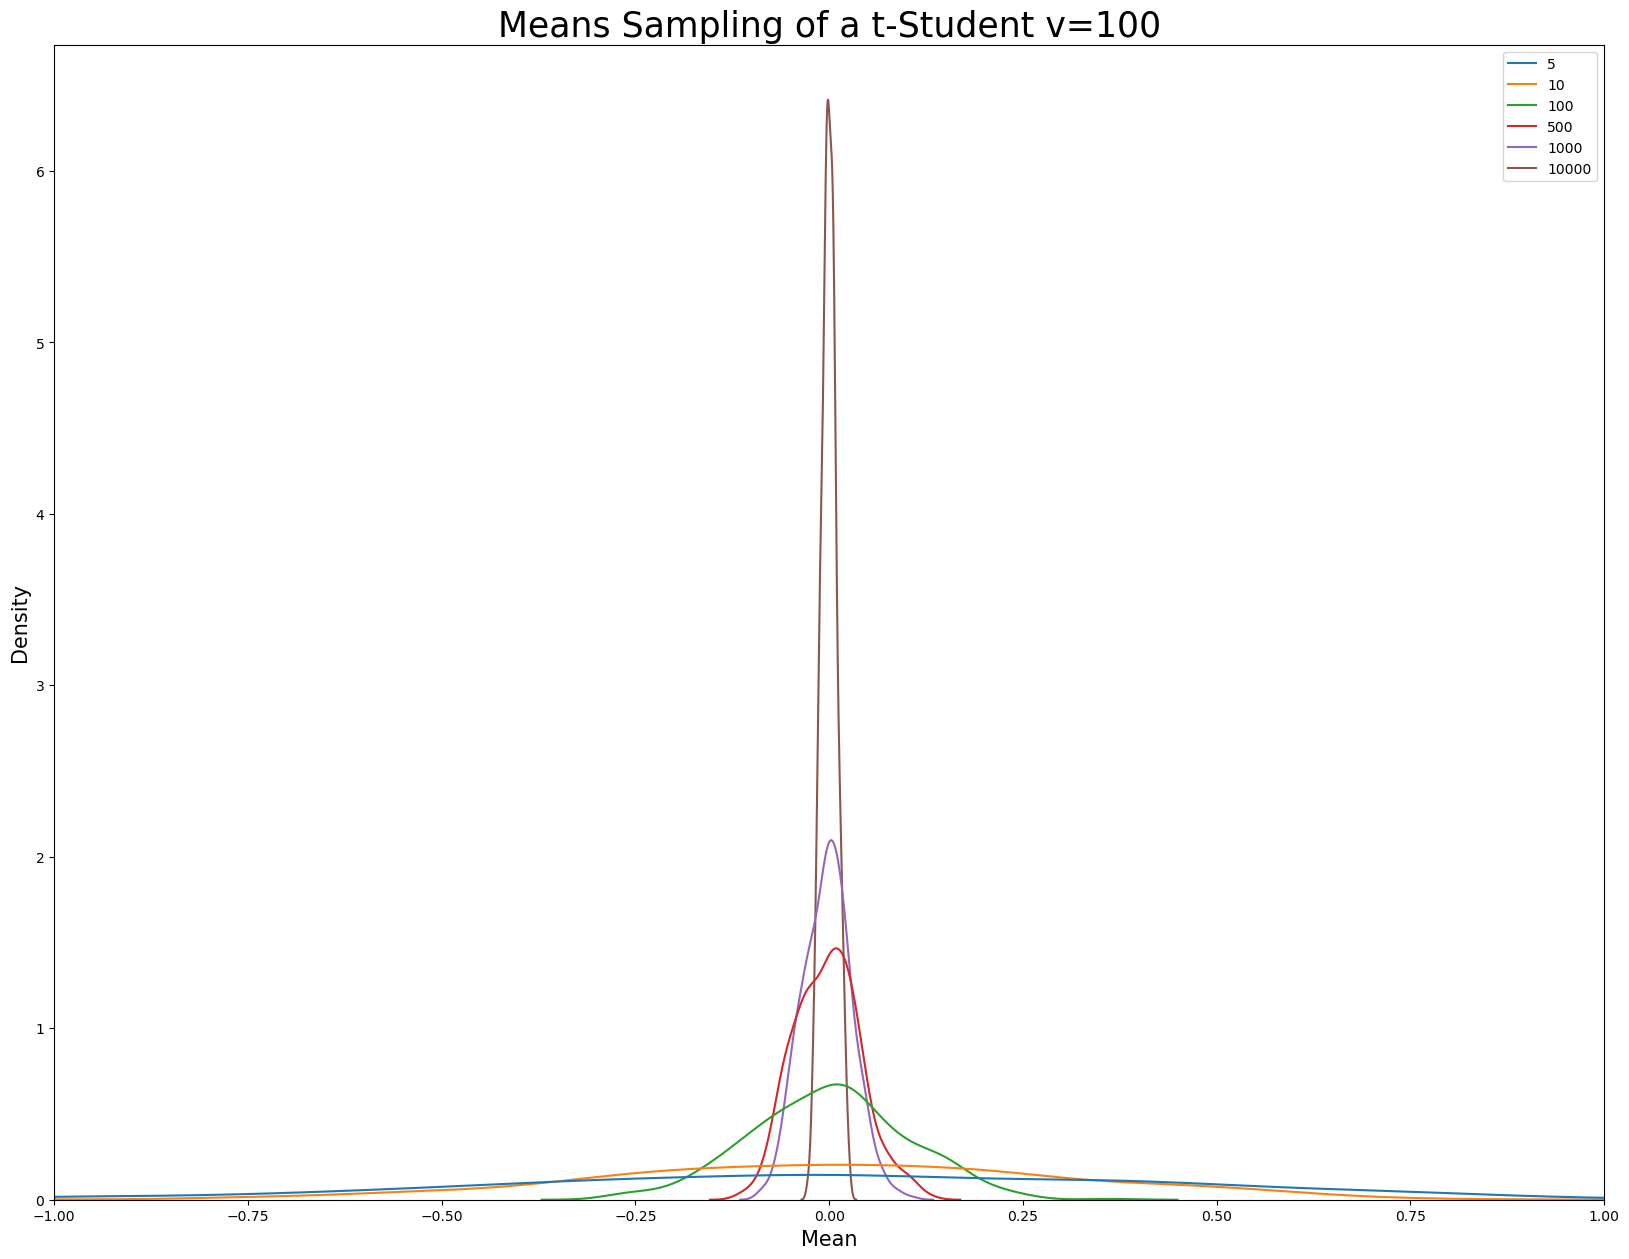

In [13]:
plt.figure(figsize=(20,15))
ax = sns.kdeplot(data = means.T)
ax.set(xlim = (-1,1))
ax.set_title(f'Means Sampling of a t-Student v={dof}',fontsize = 25)
ax.set_xlabel('Mean',fontsize = '15')
ax.set_ylabel('Density',fontsize = '15')
plt.show()

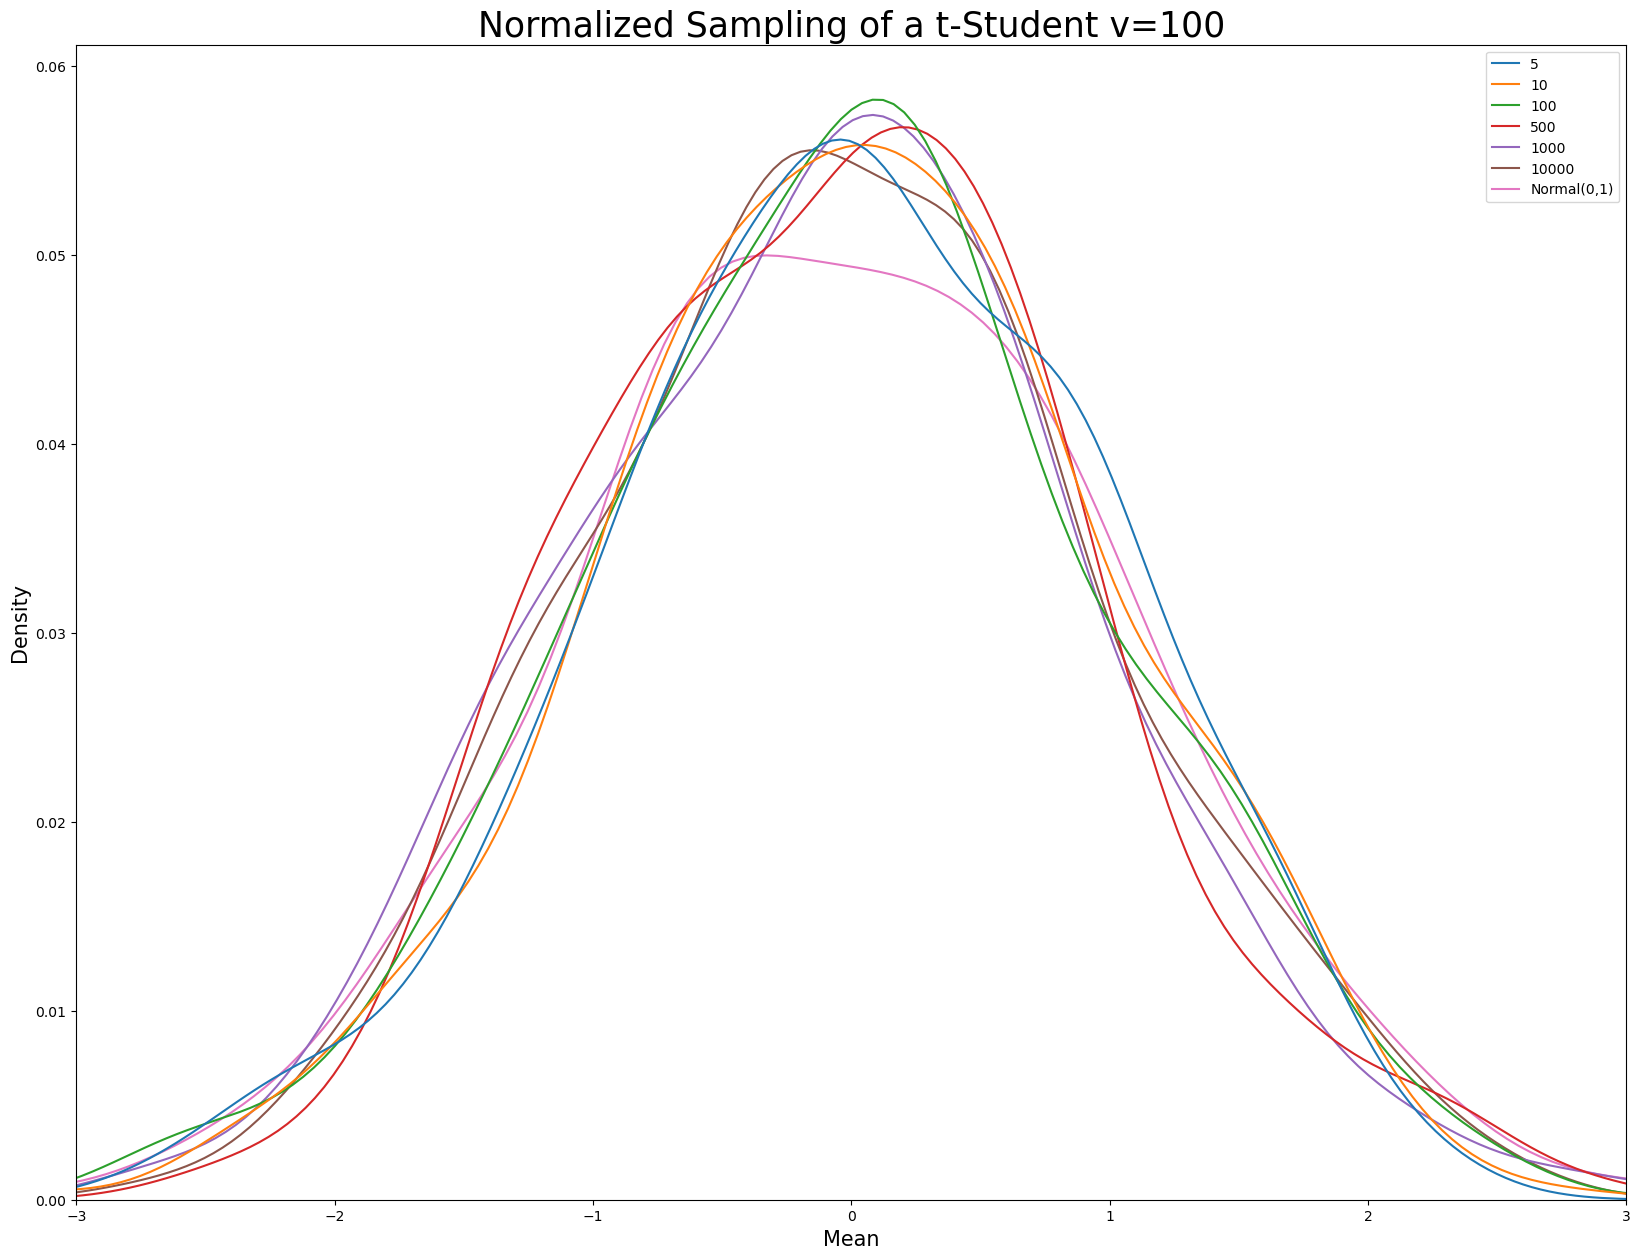

In [14]:
plt.figure(figsize=(20,15))
data = normalized.T
data['Normal(0,1)'] = norm(0,1).rvs(500) 
ax = sns.kdeplot(data = data)
ax.set(xlim = (-3,3))
ax.set_title(f'Normalized Sampling of a t-Student v={dof}',fontsize = 25)
ax.set_xlabel('Mean',fontsize = '15')
ax.set_ylabel('Density',fontsize = '15')
plt.show()

### (e)

We can notice that as $n \to \infty$ then the sample mean converges better to the true mean and the varince of the sample mean distribution comes closer to $0$. We can also notice that as $n \to \infty$ then the normalized distribution of the sample mean, i.e. $\sqrt{n} \frac{\bar{X} - \mu}{\sigma}$ it approaches better to a $N(0,1)$ distribution as shown on the plot above.

**Bear in mind that is due to the fact that we select $\nu$ such that $t_{\nu}$ holds the hypothesis needed to satisfy the CLT and LLN mainly that $\sigma$ if finite, which we'll that it isn't the case for $\nu\leq 2$ and thus the CLT and LLN doesn't apply for those cases**

### (f)

In [17]:
all_means = {}
all_norm = {}
dof_list = [100, 10, 5, 2, 1, 0.5]
for dof in dof_list:
    _, all_means[dof], _, all_norm[dof] = problem_3(dof, M, N)

Stats of a t-Student with v = 100
Mean: 0.0, Variance: 1.0204081632653061, Skewness : 0.0, Kurtosis : 0.0625
Stats of a t-Student with v = 10
Mean: 0.0, Variance: 1.25, Skewness : 0.0, Kurtosis : 1.0
Stats of a t-Student with v = 5
Mean: 0.0, Variance: 1.6666666666666667, Skewness : 0.0, Kurtosis : 6.0
Stats of a t-Student with v = 2
Mean: 0.0, Variance: inf, Skewness : nan, Kurtosis : nan
Stats of a t-Student with v = 1
Mean: inf, Variance: nan, Skewness : nan, Kurtosis : nan
Stats of a t-Student with v = 0.5
Mean: inf, Variance: nan, Skewness : nan, Kurtosis : nan


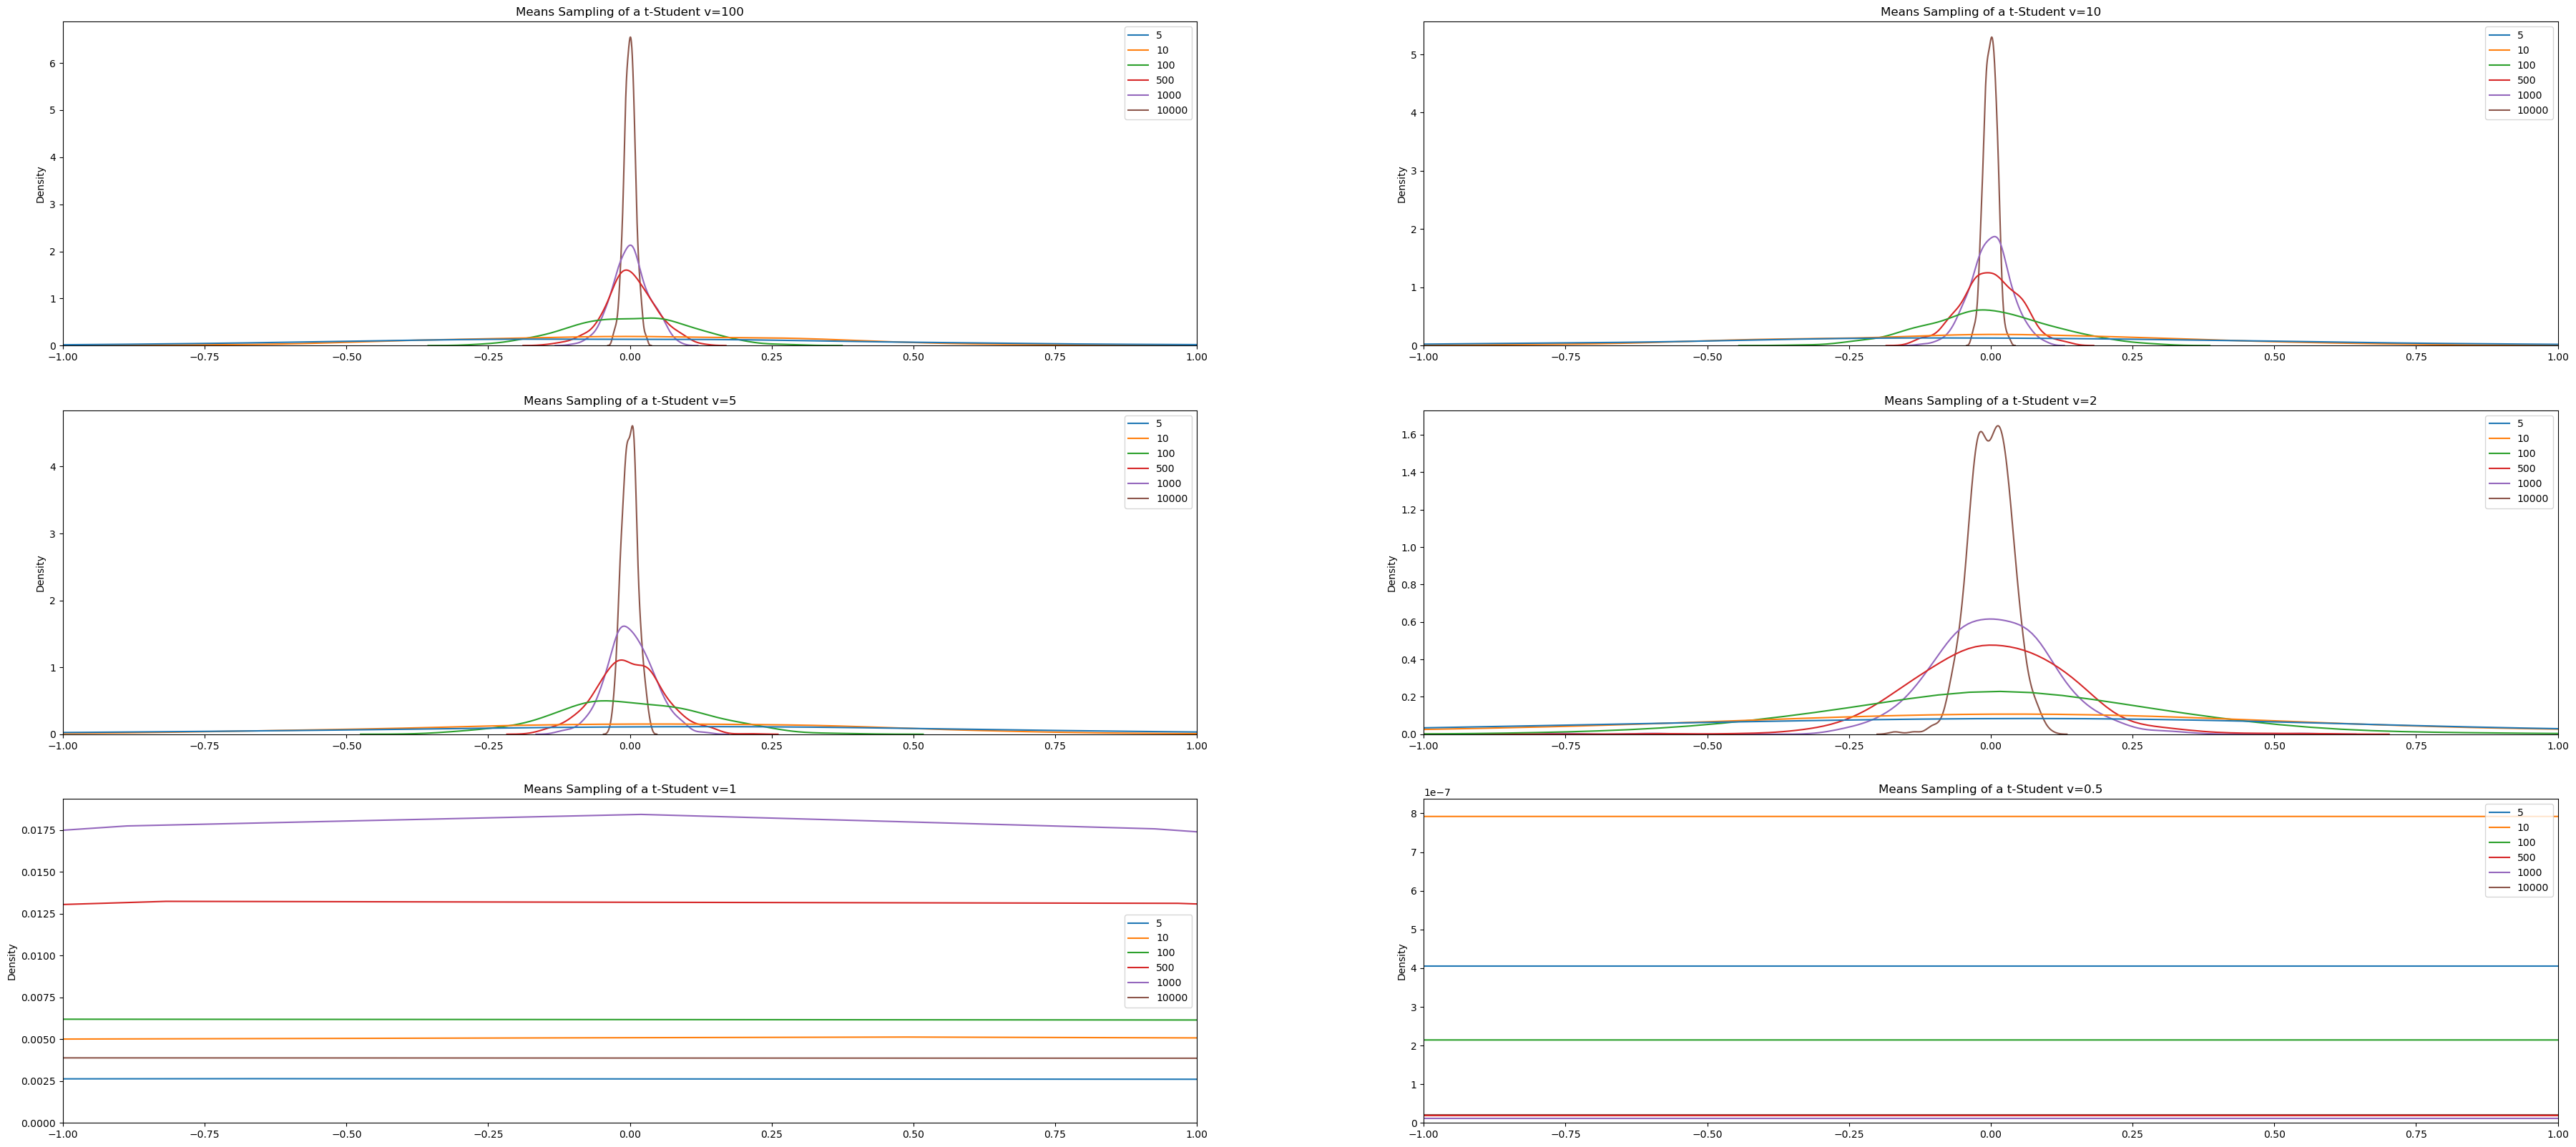

In [18]:
f, axes = plt.subplots(3, 2, figsize=(45, 20))
axes[0][0].set_title(f'Means Sampling of a t-Student v={dof_list[0]}')
axes[0][0].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[0]].T, ax = axes[0][0])
axes[0][1].set_title(f'Means Sampling of a t-Student v={dof_list[1]}')
axes[0][1].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[1]].T, ax = axes[0][1])
axes[1][0].set_title(f'Means Sampling of a t-Student v={dof_list[2]}')
axes[1][0].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[2]].T, ax = axes[1][0])
axes[1][1].set_title(f'Means Sampling of a t-Student v={dof_list[3]}')
axes[1][1].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[3]].T, ax = axes[1][1]) 
axes[2][0].set_title(f'Means Sampling of a t-Student v={dof_list[4]}')
axes[2][0].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[4]].T, ax = axes[2][0])
axes[2][1].set_title(f'Means Sampling of a t-Student v={dof_list[5]}')
axes[2][1].set(xlim = (-1,1))
sns.kdeplot(data = all_means[dof_list[5]].T, ax = axes[2][1]) 
plt.show()

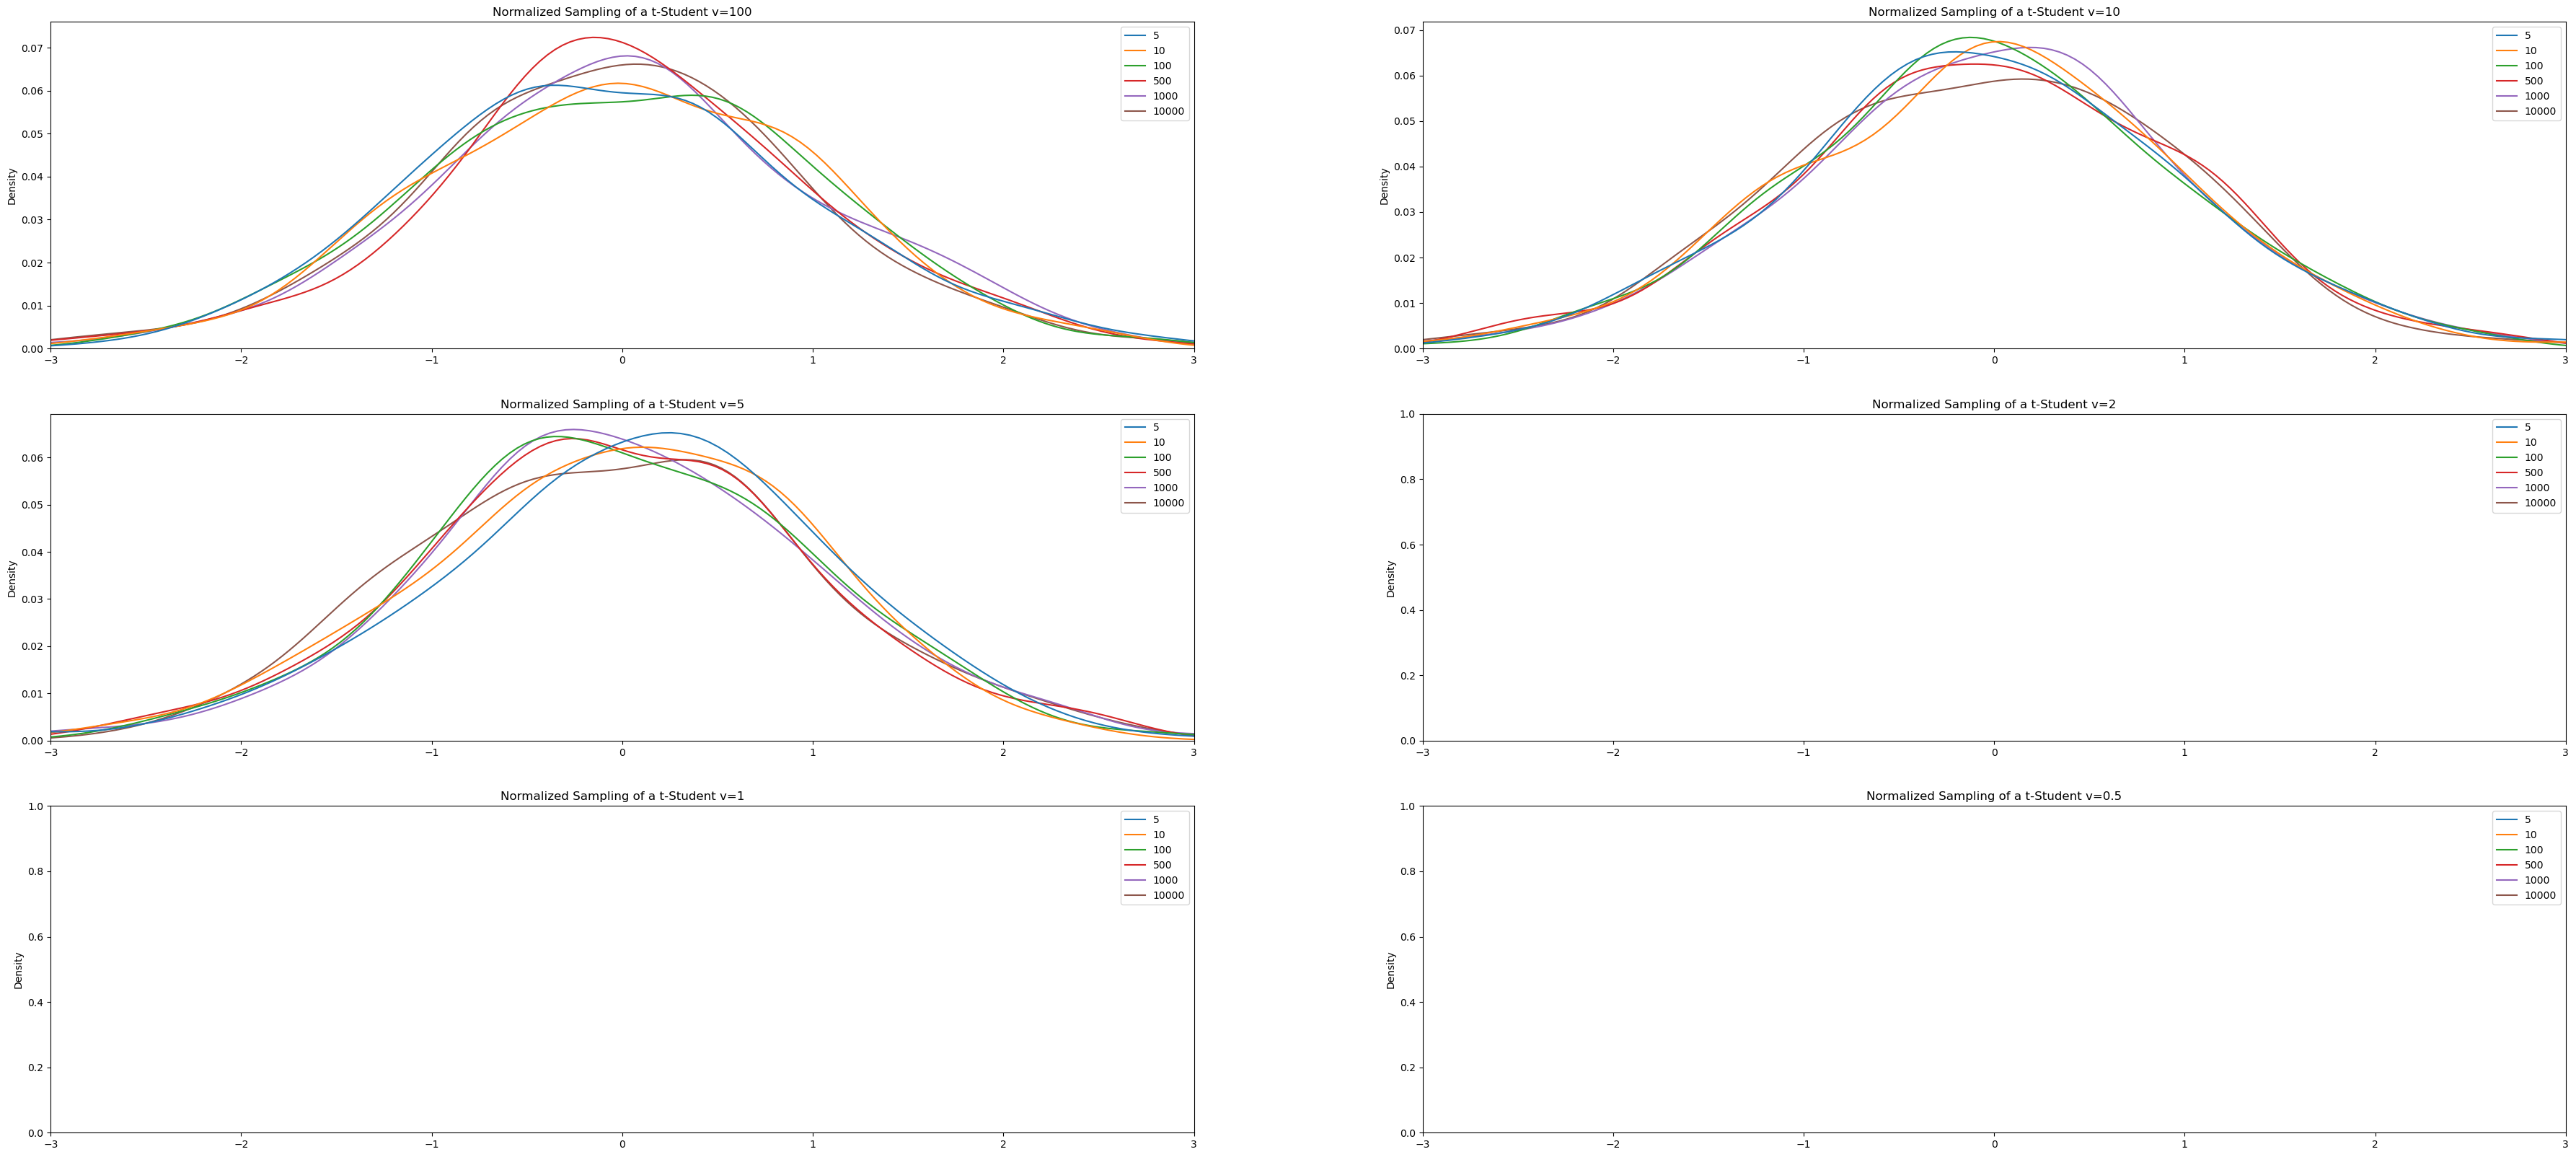

In [19]:
f, axes = plt.subplots(3, 2, figsize=(45, 20))
axes[0][0].set_title(f'Normalized Sampling of a t-Student v={dof_list[0]}')
axes[0][0].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[0]].T, ax = axes[0][0])
axes[0][1].set_title(f'Normalized Sampling of a t-Student v={dof_list[1]}')
axes[0][1].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[1]].T, ax = axes[0][1])
axes[1][0].set_title(f'Normalized Sampling of a t-Student v={dof_list[2]}')
axes[1][0].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[2]].T, ax = axes[1][0])
axes[1][1].set_title(f'Normalized Sampling of a t-Student v={dof_list[3]}')
axes[1][1].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[3]].T, ax = axes[1][1]) 
axes[2][0].set_title(f'Normalized Sampling of a t-Student v={dof_list[4]}')
axes[2][0].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[4]].T, ax = axes[2][0])
axes[2][1].set_title(f'Normalized Sampling of a t-Student v={dof_list[5]}')
axes[2][1].set(xlim = (-3,3))
sns.kdeplot(data = all_norm[dof_list[5]].T, ax = axes[2][1]) 
plt.show()

### (g)

As mentioned above, the CLT and LLN does not hold for $\nu \leq 2$ as these cases the $\sigma^2$ does not exist, recall that:
$\sigma^2 = \frac{\nu}{\nu - 2}$. Thus, the plots of the normalized means does not show any values for $\nu = 2, 1, 0.5$. Also, notice that the greater the value of $\nu$ the faster its mean converges to the real mean and there is less variance. 